In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/high.csv')
df2=pd.read_csv('/content/drive/MyDrive/low.csv')

<ipython-input-3-f3b00180aa4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


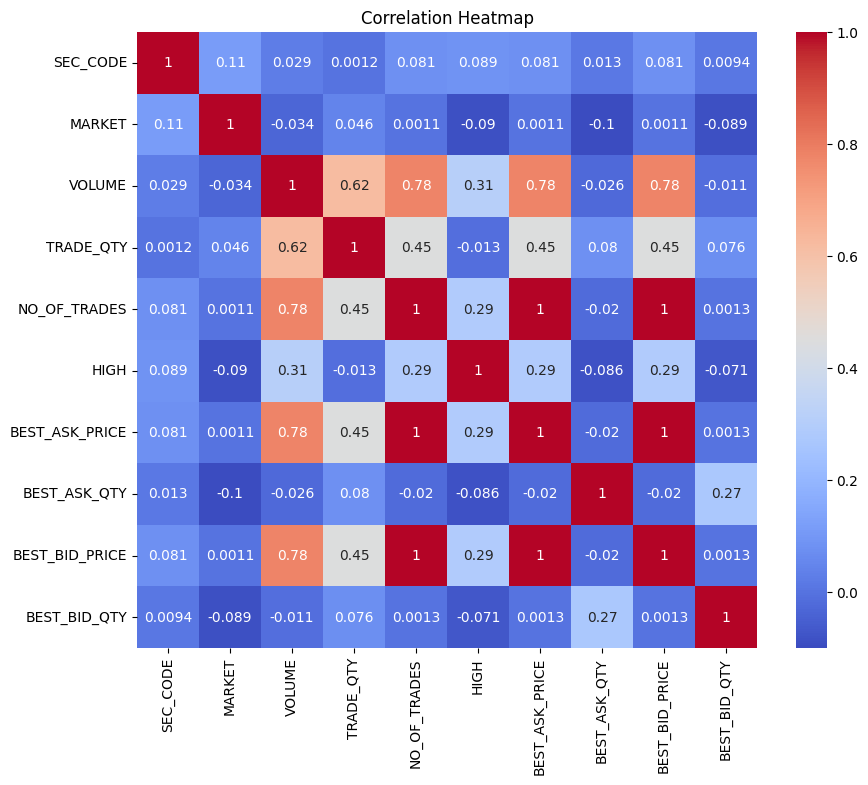

In [ ]:
corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Descriptive analysis**

### **Measures of Frequency on MARKET feature**

In [ ]:
frequency = df1['MARKET'].value_counts()
relative_frequency = df1['MARKET'].value_counts(normalize=True)
cumulative_frequency = frequency.cumsum()
cumulative_relative_frequency = relative_frequency.cumsum()
print("Frequency:")
print(frequency)
print("\nRelative Frequency:")
print(relative_frequency)
print("\nCumulative Frequency:")
print(cumulative_frequency)
print("\nCumulative Relative Frequency:")
print(cumulative_relative_frequency)

Frequency:
2    15379
1     8064
0     4569
Name: MARKET, dtype: int64

Relative Frequency:
2    0.549015
1    0.287877
0    0.163109
Name: MARKET, dtype: float64

Cumulative Frequency:
2    15379
1    23443
0    28012
Name: MARKET, dtype: int64

Cumulative Relative Frequency:
2    0.549015
1    0.836891
0    1.000000
Name: MARKET, dtype: float64


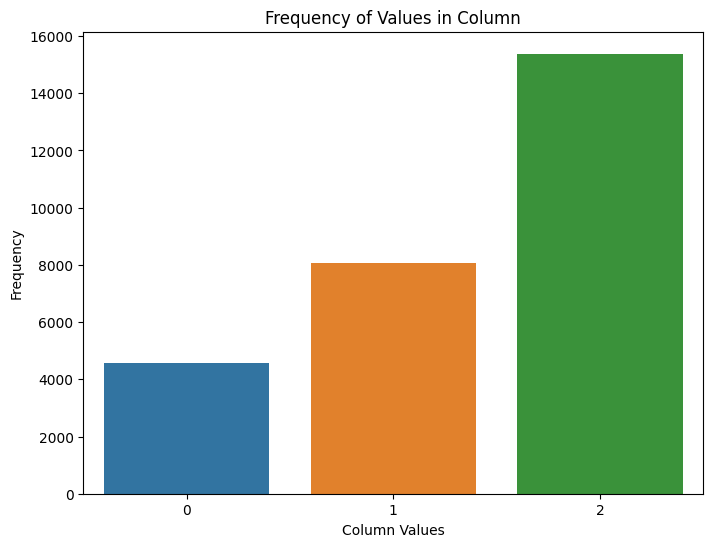

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='MARKET')
plt.title('Frequency of Values in Column')
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.show()

### **Measures of Frequency on SYMBOL1 feature**

In [ ]:
frequency = df1['SYMBOL1'].value_counts()
relative_frequency = df1['SYMBOL1'].value_counts(normalize=True)
cumulative_frequency = frequency.cumsum()
cumulative_relative_frequency = relative_frequency.cumsum()
print("Frequency:")
print(frequency)
print("\nRelative Frequency:")
print(relative_frequency)
print("\nCumulative Frequency:")
print(cumulative_frequency)
print("\nCumulative Relative Frequency:")
print(cumulative_relative_frequency)

Frequency:
JOIB    247
JOPT    247
CABK    247
ATCO    247
AHLI    247
       ... 
HOLI      2
DMAN      1
MEHC      1
ALFA      1
HIMM      1
Name: SYMBOL1, Length: 213, dtype: int64

Relative Frequency:
JOIB    0.008818
JOPT    0.008818
CABK    0.008818
ATCO    0.008818
AHLI    0.008818
          ...   
HOLI    0.000071
DMAN    0.000036
MEHC    0.000036
ALFA    0.000036
HIMM    0.000036
Name: SYMBOL1, Length: 213, dtype: float64

Cumulative Frequency:
JOIB      247
JOPT      494
CABK      741
ATCO      988
AHLI     1235
        ...  
HOLI    28008
DMAN    28009
MEHC    28010
ALFA    28011
HIMM    28012
Name: SYMBOL1, Length: 213, dtype: int64

Cumulative Relative Frequency:
JOIB    0.008818
JOPT    0.017635
CABK    0.026453
ATCO    0.035271
AHLI    0.044088
          ...   
HOLI    0.999857
DMAN    0.999893
MEHC    0.999929
ALFA    0.999964
HIMM    1.000000
Name: SYMBOL1, Length: 213, dtype: float64


### **Descriptive statistics on VOLUME, TRADE_QTY, NO_OF_TRADES columns in each market**

In [ ]:
selected_features = ['VOLUME', 'TRADE_QTY', 'NO_OF_TRADES']
for market in df1['MARKET'].unique():
  statistics_high = df1[df1['MARKET'] == market][selected_features].describe()
  print("Descriptive Statistics for Market :",market)
  print(statistics_high,"\n")

Descriptive Statistics for Market : 1
             VOLUME     TRADE_QTY  NO_OF_TRADES
count  8.064000e+03  8.064000e+03   8064.000000
mean   1.520891e+05  5.106017e+04     48.378968
std    4.885013e+05  1.511826e+05    108.923359
min    9.200000e-01  1.000000e+00      1.000000
25%    1.750000e+03  8.945000e+02      3.000000
50%    1.059478e+04  5.935000e+03     11.000000
75%    7.787513e+04  3.538500e+04     40.000000
max    8.868824e+06  5.741963e+06   1700.000000 

Descriptive Statistics for Market : 2
             VOLUME     TRADE_QTY  NO_OF_TRADES
count  1.537900e+04  1.537900e+04  15379.000000
mean   3.276936e+04  4.503540e+04     22.784706
std    1.860757e+05  1.577142e+05     36.940360
min    1.200000e-01  1.000000e+00      1.000000
25%    7.279650e+02  1.242000e+03      3.000000
50%    3.831300e+03  7.150000e+03      9.000000
75%    1.622495e+04  3.103300e+04     25.000000
max    8.733137e+06  4.912152e+06    545.000000 

Descriptive Statistics for Market : 0
             VOLUM

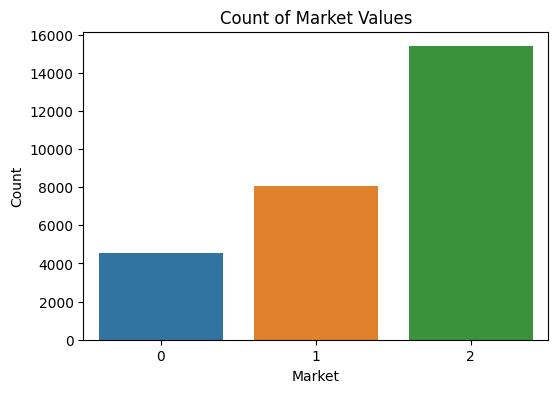

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='MARKET')
plt.title('Count of Market Values')
plt.xlabel('Market')
plt.ylabel('Count')
plt.show()

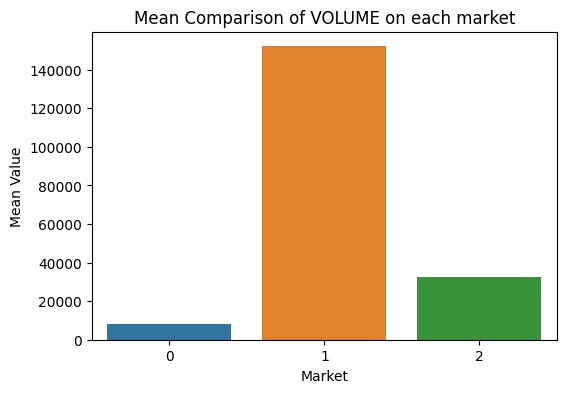

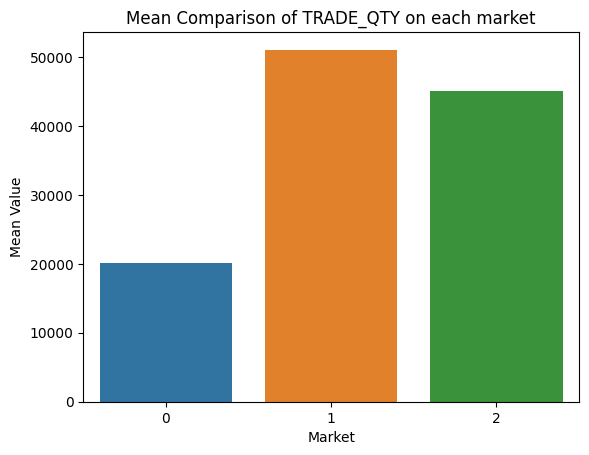

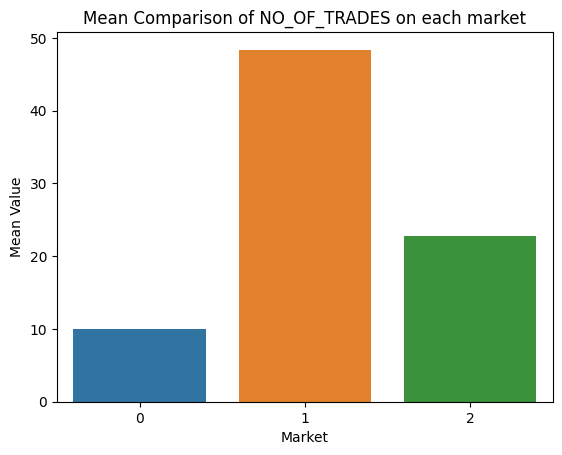

In [ ]:
df1_mean = df1.groupby('MARKET')[selected_features].mean().reset_index()
plt.figure(figsize=(6, 4))
for feature in selected_features:
  sns.barplot(data=df1_mean, x='MARKET', y=feature)
  plt.title('Mean Comparison of '+str(feature)+' on each market')
  plt.xlabel('Market')
  plt.ylabel('Mean Value')
  plt.show()

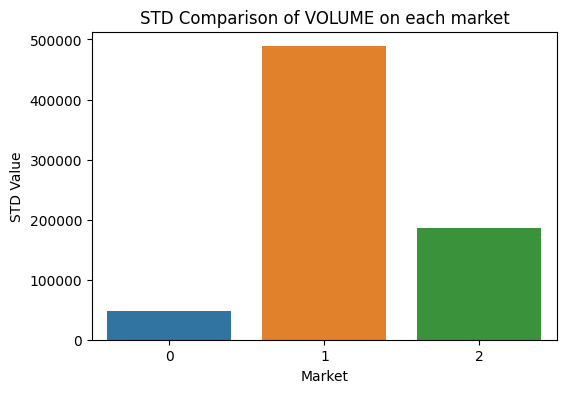

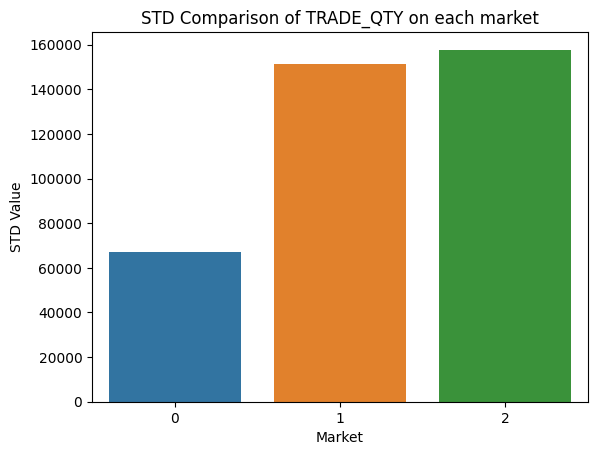

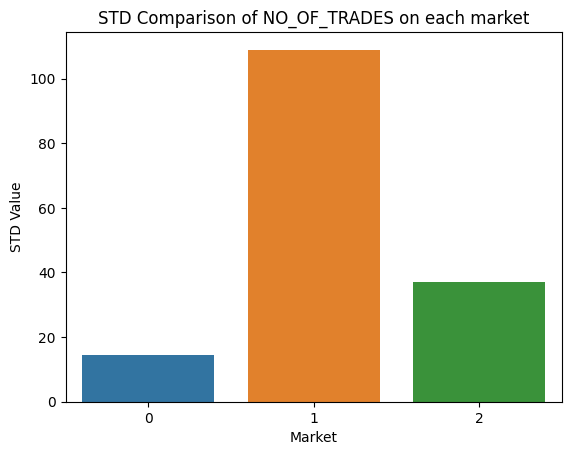

In [ ]:
df1_mean = df1.groupby('MARKET')[selected_features].std().reset_index()
plt.figure(figsize=(6, 4))
for feature in selected_features:
  sns.barplot(data=df1_mean, x='MARKET', y=feature)
  plt.title('STD Comparison of '+str(feature)+' on each market')
  plt.xlabel('Market')
  plt.ylabel('STD Value')
  plt.show()

### **Number of trade in each market and classifying them by month**

In [ ]:
df1['TRADE_DATE'] = pd.to_datetime(df1['TRADE_DATE'])
df1['TRADE_MONTH'] = df1['TRADE_DATE'].dt.month
trade_counts = df1.groupby(['TRADE_MONTH', 'MARKET']).size()
print(trade_counts)
df1.drop('TRADE_MONTH',axis=1,inplace=True)

TRADE_MONTH  MARKET
1            0          330
             1          588
             2         1247
2            0          354
             1          598
             2         1270
3            0          423
             1          672
             2         1389
4            0          317
             1          605
             2         1117
5            0          395
             1          657
             2         1137
6            0          469
             1          777
             2         1506
7            0          399
             1          755
             2         1436
8            0          394
             1          763
             2         1357
9            0          393
             1          693
             2         1303
10           0          390
             1          671
             2         1249
11           0          369
             1          671
             2         1218
12           0          336
             1          614


<ipython-input-11-fbc65c86d522>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['TRADE_DATE'] = pd.to_datetime(df1['TRADE_DATE'])


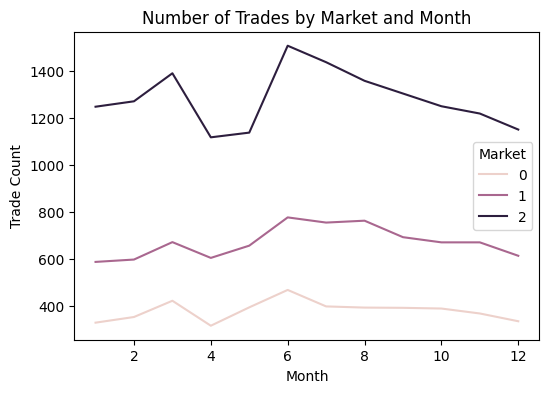

In [ ]:
df_monthly_trades = df1.groupby([df1['TRADE_DATE'].dt.month, 'MARKET'])['NO_OF_TRADES'].count().reset_index()
df_monthly_trades.columns = ['Month', 'Market', 'Trade Count']
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_monthly_trades, x='Month', y='Trade Count', hue='Market')
plt.title('Number of Trades by Market and Month')
plt.xlabel('Month')
plt.ylabel('Trade Count')
plt.show()

### **Measures of Central tendancy and dispersion on VOLUME feature**

In [ ]:
mean = df1['VOLUME'].mean()
median = df1['VOLUME'].median()
range_value = df1['VOLUME'].max() - df1['VOLUME'].min()
variance = df1['VOLUME'].var()
std_deviation = df1['VOLUME'].std()
interquartile_range = np.percentile(df1['VOLUME'], 75) - np.percentile(df1['VOLUME'], 25)
coefficient_of_variation = std_deviation / mean
print("Mean:", mean)
print("Median:", median)
print("Range:", range_value)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Interquartile Range:", interquartile_range)
print("Coefficient of Variation:", coefficient_of_variation)

Mean: 63126.7665386263
Median: 3831.125
Range: 8868824.35
Variance: 91358547240.11235
Standard Deviation: 302255.764610226
Interquartile Range: 19505.1175
Coefficient of Variation: 4.788076139228203


### **Measures of Position on TRADE_QTY feature**

In [ ]:
quartiles = df1['TRADE_QTY'].quantile(q=[0.25, 0.5, 0.75])
deciles = df1['TRADE_QTY'].quantile(q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
z_scores = (df1['TRADE_QTY'] - np.mean(df1['TRADE_QTY'])) / np.std(df1['TRADE_QTY'])
print("\nQuartiles:\n", quartiles)
print("\nDeciles:\n", deciles)
print("\nZ-scores:\n",z_scores)


Quartiles:
 0.25     1000.00
0.50     5873.50
0.75    28436.75
Name: TRADE_QTY, dtype: float64

Deciles:
 0.1      200.0
0.2      600.0
0.3     1425.0
0.4     3000.0
0.5     5873.5
0.6    11020.0
0.7    20372.5
0.8    40334.8
0.9    97303.7
Name: TRADE_QTY, dtype: float64

Z-scores:
 0         0.080416
1        -0.232094
2        -0.289149
3        -0.291436
4        -0.191743
           ...    
28007    13.356366
28008    -0.291016
28009    -0.223367
28010    -0.290706
28011     0.882547
Name: TRADE_QTY, Length: 28012, dtype: float64


### **Correlation between the BEST_BID_PRICE and BEST_ASK_PRICE**

In [ ]:
correlation = df1['BEST_BID_PRICE'].corr(df1['BEST_ASK_PRICE'])
print("Correlation between BEST_BID_PRICE and BEST_ASK_PRICE:", correlation)

Correlation between BEST_BID_PRICE and BEST_ASK_PRICE: 0.9999988959215977


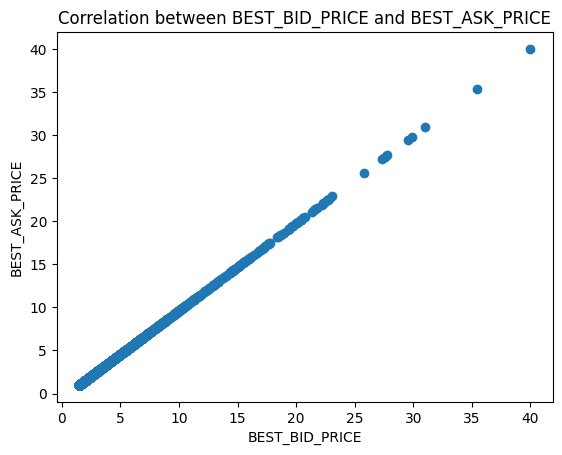

In [ ]:
data = df1[['BEST_BID_PRICE', 'BEST_ASK_PRICE']]
plt.scatter(data['BEST_BID_PRICE'], data['BEST_ASK_PRICE'])
plt.xlabel('BEST_BID_PRICE')
plt.ylabel('BEST_ASK_PRICE')
plt.title('Correlation between BEST_BID_PRICE and BEST_ASK_PRICE')
plt.show()

In [ ]:
df1.drop('BEST_ASK_PRICE',axis=1,inplace=True)
df2.drop('BEST_ASK_PRICE',axis=1,inplace=True)

### **Box plots, scatter plots and outlier removel for VOLUME feature**

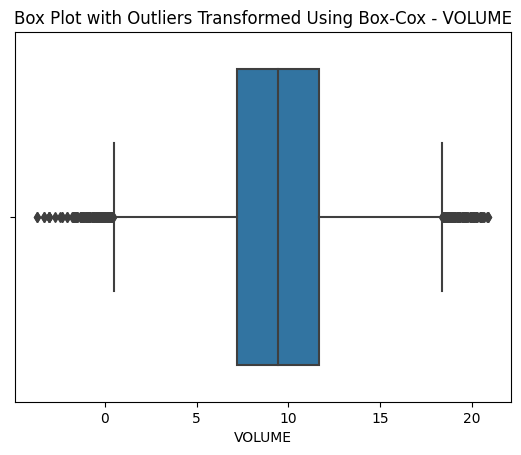

In [ ]:
from scipy.stats import boxcox
df1['VOLUME_boxcox'] = boxcox(df1['VOLUME'], lmbda=None)[0]
sns.boxplot(data=df1, x='VOLUME_boxcox')
plt.title('Box Plot with Outliers Transformed Using Box-Cox - VOLUME')
plt.xlabel('VOLUME')
plt.show()
df1.drop('VOLUME_boxcox',axis=1,inplace=True)

###**Z score remove outliers**

In [ ]:
# df1_zscore=df1.copy()
# mean = df1_zscore['VOLUME'].mean()
# std = df1_zscore['VOLUME'].std()
# df1_zscore['z_score'] = (df1_zscore['VOLUME'] - mean) / std
# df1_zscore['outlier_zscore'] = df1_zscore['z_score'] > 3
# outliers_zscore = df1_zscore[df1_zscore['outlier_zscore'] == True]
# df1_zscore.drop(df1_zscore[df1_zscore['outlier_zscore'] == True].index, inplace=True)

In [ ]:
# sns.boxplot(x=df1_zscore['VOLUME'])
# plt.title('Box Plot - VOLUME')
# plt.xlabel('VOLUME')
# plt.show()

### **IQR remove outliers**

In [ ]:
# df1_IQR=df1.copy()
# q1 = df1_IQR['VOLUME'].quantile(0.25)
# q3 = df1_IQR['VOLUME'].quantile(0.75)
# iqr = q3 - q1
# df1_IQR['outlier_iqr'] = ((df1_IQR['VOLUME'] < (q1 - 1.5 * iqr)) | (df1_IQR['VOLUME'] > (q3 + 1.5 * iqr)))
# outliers_iqr = df1_IQR[df1_IQR['outlier_iqr'] == True]
# df1_IQR.drop(df1_IQR[df1_IQR['outlier_iqr'] == True].index, inplace=True)

In [ ]:
# sns.boxplot(x=df1_IQR['VOLUME'])
# plt.title('Box Plot - VOLUME')
# plt.xlabel('VOLUME')
# plt.show()

### **Z score and IQR outliers removal**

In [ ]:
# df_IQRandZscore = df1.copy()
# q1 = df_IQRandZscore['VOLUME'].quantile(0.25)
# q3 = df_IQRandZscore['VOLUME'].quantile(0.75)
# iqr = q3 - q1
# df_IQRandZscore['outlier_iqr'] = ((df_IQRandZscore['VOLUME'] < (q1 - 1.5 * iqr)) | (df_IQRandZscore['VOLUME'] > (q3 + 1.5 * iqr)))

# mean = df_IQRandZscore['VOLUME'].mean()
# std = df_IQRandZscore['VOLUME'].std()
# df_IQRandZscore['z_score'] = (df_IQRandZscore['VOLUME'] - mean) / std
# df_IQRandZscore['outlier_zscore'] = df_IQRandZscore['z_score'] > 3

# df_IQRandZscore['outlier_combined'] = df_IQRandZscore['outlier_iqr'] | df_IQRandZscore['outlier_zscore']

# outliers_combined = df_IQRandZscore[df_IQRandZscore['outlier_combined'] == True]
# df_IQRandZscore.drop(outliers_combined.index, inplace=True)

# df_IQRandZscore.drop(['outlier_iqr', 'z_score', 'outlier_zscore', 'outlier_combined'], axis=1, inplace=True)

In [ ]:
# sns.boxplot(x=df_IQRandZscore['VOLUME'])

# plt.title('Box Plot - VOLUME')
# plt.xlabel('VOLUME')

# plt.show()

In [ ]:
# sns.displot(df_IQRandZscore['VOLUME'])

# plt.title('Distribution Plot - VOLUME')
# plt.xlabel('VOLUME')

# plt.show()

### **Contingency tables**

In [ ]:
contingency_table= pd.crosstab(df1['MARKET'], df1['SYMBOL1'])
print("Contingency Table for  column:")
pd.set_option('display.max_columns', None)
print(contingency_table)

Contingency Table for  column:
SYMBOL1  AAIN  AALU  ABCO  ABLA  ABMS  ABUS  ACDT  AEIN  AEIV  AHLI  AICJ  \
MARKET                                                                      
0           0     0     0   190     0     0     0   169     0     0     0   
1          33    89   197     0     0     0     0     0     0   247     8   
2           0    26     0     0    14   223   128     0   214     0    36   

SYMBOL1  AIEI  AIFE  AIHO  AIUI  AJIB  ALFA  AMAD  AMAL  AMMI  AMON  AMWJ  \
MARKET                                                                      
0           0     0     0     0     0     0     0     0     0     0     0   
1         128    30     0     0   184     0     0     0     0     0     0   
2           0     0    88   103     0     1   154   134     3   132   162   

SYMBOL1  AMWL  AOIC  APCT  APHC  APOT  AQAR  AQRM  ARAS  ARBK  ARED  ARGR  \
MARKET                                                                      
0         219     0     0    18     0     0

In [ ]:
contingency_table= pd.crosstab(df1['MARKET'], df1['NO_OF_TRADES'])
print("Contingency Table for  column:")
print(contingency_table)

Contingency Table for  column:
NO_OF_TRADES  1     2     3     4     5     6     7     8     9     10    \
MARKET                                                                     
0              681   643   486   359   316   249   188   175   154   121   
1              859   702   508   430   363   285   243   203   203   191   
2             1551  1334  1034   910   707   630   592   501   471   420   

NO_OF_TRADES  11    12    13    14    15    16    17    18    19    20    \
MARKET                                                                     
0               94    89    68    84    57    64    51    48    33    40   
1              159   143   112   121   106   117   103   100    76    69   
2              373   330   304   281   274   248   241   220   208   160   

NO_OF_TRADES  21    22    23    24    25    26    27    28    29    30    \
MARKET                                                                     
0               26    32    23    29    29    24    18 

# **HIGH prediction**

## **Feature selection and modelling**

### **Encoding**

In [ ]:
# df1=df_IQRandZscore.copy()
df1['TRADE_DATE'] = pd.to_datetime(df1['TRADE_DATE'])
cat_columns = df1.select_dtypes(['object', 'datetime64']).columns
label_encoder = LabelEncoder()
df1[cat_columns] = df1[cat_columns].apply(LabelEncoder().fit_transform)

In [ ]:
iteration=30

### **Select from model**

#### **Linear Regression**

In [ ]:
X = df1.drop(["HIGH"], axis=1)
y = df1["HIGH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
sfm = SelectFromModel(model, threshold="median")
sfm.fit(X_train, y_train)
selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SYMBOL1', 'MARKET', 'NO_OF_TRADES', 'BEST_BID_PRICE'], dtype='object')


In [ ]:
dt = LinearRegression()
sum_LR_mse_SFM = []
sum_LR_mae_SFM = []
sum_LR_rmse_SFM = []
sum_LR_r2_SFM = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum_LR_mse_SFM.append(mse)
  sum_LR_mae_SFM.append(mae)
  sum_LR_rmse_SFM.append(rmse)
  sum_LR_r2_SFM.append(r2)

avg_LR_mse_SFM = sum(sum_LR_mse_SFM) / iteration
avg_LR_mae_SFM = sum(sum_LR_mae_SFM) / iteration
avg_LR_rmse_SFM = sum(sum_LR_rmse_SFM) / iteration
avg_LR_r2_SFM = sum(sum_LR_r2_SFM) / iteration


#### **Decision Tree**

In [ ]:
X = df1.drop(["HIGH"], axis=1)
y = df1["HIGH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

sfm = SelectFromModel(model, threshold="median")
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY', 'BEST_ASK_QTY'], dtype='object')


In [ ]:
dt = DecisionTreeRegressor()
sum_DT_mse_SFM = []
sum_DT_mae_SFM = []
sum_DT_rmse_SFM = []
sum_DT_r2_SFM = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum_DT_mse_SFM.append(mse)
  sum_DT_mae_SFM.append(mae)
  sum_DT_rmse_SFM.append(rmse)
  sum_DT_r2_SFM.append(r2)

avg_DT_mse_SFM = sum(sum_DT_mse_SFM) / iteration
avg_DT_mae_SFM = sum(sum_DT_mae_SFM) / iteration
avg_DT_rmse_SFM = sum(sum_DT_rmse_SFM) / iteration
avg_DT_r2_SFM = sum(sum_DT_r2_SFM) / iteration

#### **Random Forest**

In [ ]:
X = df1.drop(["HIGH"], axis=1)
y = df1["HIGH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

sfm = SelectFromModel(model, threshold='median')
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY', 'BEST_ASK_QTY'], dtype='object')


In [ ]:
dt = RandomForestRegressor()
sum_RF_mse_SFM = []
sum_RF_mae_SFM = []
sum_RF_r2_SFM = []
sum_RF_rmse_SFM = []

for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    sum_RF_mse_SFM.append(mse)
    sum_RF_rmse_SFM.append(rmse)
    sum_RF_mae_SFM.append(mae)
    sum_RF_r2_SFM.append(r2)

avg_RF_mse_SFM = sum(sum_RF_mse_SFM) / iteration
avg_RF_rmse_SFM = sum(sum_RF_rmse_SFM) / iteration
avg_RF_mae_SFM = sum(sum_RF_mae_SFM) / iteration
avg_RF_r2_SFM = sum(sum_RF_r2_SFM) / iteration


### **Recursive Feature Elimination**

#### **Linear Regression**

In [ ]:
X = df1.drop(["HIGH"], axis=1)
y = df1["HIGH"]
estimator = LinearRegression()
n_features_to_select = 8
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)
support_mask = rfe.support_
selected_features = X.columns[support_mask]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_BID_PRICE'],
      dtype='object')


In [ ]:
dt = LinearRegression()
sum_LR_mse_RFE = []
sum_LR_mae_RFE = []
sum_LR_rmse_RFE = []
sum_LR_r2_RFE = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum_LR_mse_RFE.append(mse)
  sum_LR_mae_RFE.append(mae)
  sum_LR_rmse_RFE.append(rmse)
  sum_LR_r2_RFE.append(r2)

avg_LR_mse_RFE = sum(sum_LR_mse_RFE) / iteration
avg_LR_mae_RFE = sum(sum_LR_mae_RFE) / iteration
avg_LR_rmse_RFE = sum(sum_LR_rmse_RFE) / iteration
avg_LR_r2_RFE = sum(sum_LR_r2_RFE) / iteration


#### **Decision Tree**

In [ ]:
X = df1.drop(["HIGH"], axis=1)
y = df1["HIGH"]
estimator = DecisionTreeRegressor()
n_features_to_select = 8
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)
support_mask = rfe.support_
selected_features = X.columns[support_mask]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'BEST_ASK_QTY', 'BEST_BID_QTY'],
      dtype='object')


In [ ]:
dt = DecisionTreeRegressor()
sum_DT_mse_RFE = []
sum_DT_mae_RFE = []
sum_DT_rmse_RFE = []
sum_DT_r2_RFE = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum_DT_mse_RFE.append(mse)
  sum_DT_mae_RFE.append(mae)
  sum_DT_rmse_RFE.append(rmse)
  sum_DT_r2_RFE.append(r2)

avg_DT_mse_RFE = sum(sum_DT_mse_RFE) / iteration
avg_DT_mae_RFE = sum(sum_DT_mae_RFE) / iteration
avg_DT_rmse_RFE = sum(sum_DT_rmse_RFE) / iteration
avg_DT_r2_RFE = sum(sum_DT_r2_RFE) / iteration


#### **Random Forest**

In [ ]:
X = df1.drop(["HIGH"], axis=1)
y = df1["HIGH"]
estimator = RandomForestRegressor()
n_features_to_select = 8
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)
support_mask = rfe.support_
selected_features = X.columns[support_mask]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')


In [ ]:
dt = RandomForestRegressor()
sum_RF_mse_RFE = []
sum_RF_mae_RFE = []
sum_RF_r2_RFE = []
sum_RF_rmse_RFE = []

for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    sum_RF_mse_RFE.append(mse)
    sum_RF_rmse_RFE.append(rmse)
    sum_RF_mae_RFE.append(mae)
    sum_RF_r2_RFE.append(r2)

avg_RF_mse_RFE = sum(sum_RF_mse_RFE) / iteration
avg_RF_rmse_RFE = sum(sum_RF_rmse_RFE) / iteration
avg_RF_mae_RFE = sum(sum_RF_mae_RFE) / iteration
avg_RF_r2_RFE = sum(sum_RF_r2_RFE) / iteration


## **Results**

In [ ]:
print("Select from model feature selection technique:\n")
print("Linear Regression:")
print("MSE =", avg_LR_mse_SFM)
print("MAE =", avg_LR_mae_SFM)
print("RMSE =", avg_LR_rmse_SFM)
print("R2 =", avg_LR_r2_SFM * 100)
print("_____________________________________\n")
print("Decision Tree:")
print("MSE =", avg_DT_mse_SFM)
print("MAE =", avg_DT_mae_SFM)
print("RMSE =", avg_DT_rmse_SFM)
print("R2 =", avg_DT_r2_SFM * 100)
print("_____________________________________\n")
print("Random Forest:")
print("MSE =", avg_RF_mse_SFM)
print("MAE =", avg_RF_mae_SFM)
print("RMSE =", avg_RF_rmse_SFM)
print("R2 =", avg_RF_r2_SFM * 100)
print("\n_______________________________________________________________\n\n")
print("Recursive Feature Elimination technique:\n")
print("Linear Regression:")
print("MSE =", avg_LR_mse_RFE)
print("MAE =", avg_LR_mae_RFE)
print("RMSE =", avg_LR_rmse_RFE)
print("R2 =", avg_LR_r2_RFE * 100)
print("_____________________________________\n")
print("Decision Tree:")
print("MSE =", avg_DT_mse_RFE)
print("MAE =", avg_DT_mae_RFE)
print("RMSE =", avg_DT_rmse_RFE)
print("R2 =", avg_DT_r2_RFE * 100)
print("_____________________________________\n")
print("Random Forest:")
print("MSE =", avg_RF_mse_RFE)
print("MAE =", avg_RF_mae_RFE)
print("RMSE =", avg_RF_rmse_RFE)
print("R2 =", avg_RF_r2_RFE * 100)


Select from model feature selection technique:

Linear Regression:
MSE = 19.748166078435926
MAE = 1.6979792830102034
RMSE = 4.441898903574381
R2 = 10.14878792419635
_____________________________________

Decision Tree:
MSE = 1.0553562311390356
MAE = 0.18562825455757054
RMSE = 1.0194634460257066
R2 = 95.21578643687502
_____________________________________

Random Forest:
MSE = 0.5512147688481128
MAE = 0.1408730915322005
RMSE = 0.7385592050486754
R2 = 97.49765488512806

_______________________________________________________________


Recursive Feature Elimination technique:

Linear Regression:
MSE = 17.909578734090015
MAE = 1.6464195360887603
RMSE = 4.229871876102822
R2 = 18.5097854462121
_____________________________________

Decision Tree:
MSE = 1.3472191070493598
MAE = 0.20308791470322246
RMSE = 1.1496697263367177
R2 = 93.89440538958546
_____________________________________

Random Forest:
MSE = 0.5723134505964587
MAE = 0.14725375267742397
RMSE = 0.751643920738745
R2 = 97.39745606900

## **Visualization**

### **Bar plots**

####**DT & RF**

##### **DT & RF MSE**

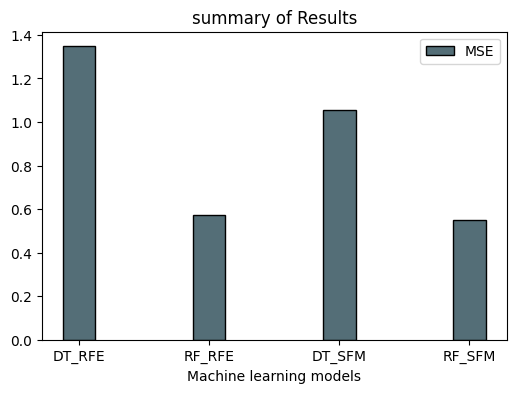

In [ ]:
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
machine_learning_model_mse=[avg_DT_mse_RFE,avg_RF_mse_RFE,avg_DT_mse_SFM,avg_RF_mse_SFM]

X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(6, 4))

plt.bar(X_axis+0, machine_learning_model_mse, color ="#546E77",width = 0.25,edgecolor = 'black',label = 'MSE')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

##### **DT & RF MAE**

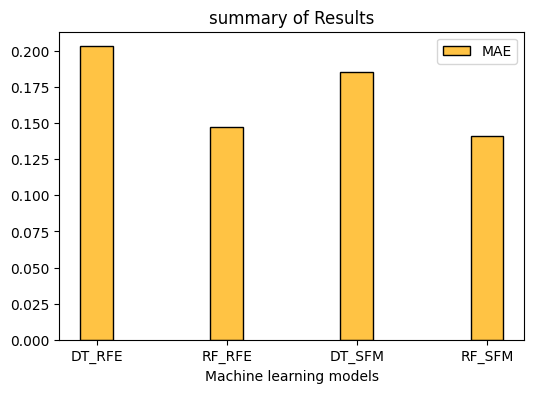

In [112]:
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
machine_learning_model_mse=[avg_DT_mae_RFE,avg_RF_mae_RFE,avg_DT_mae_SFM,avg_RF_mae_SFM]

X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(6, 4))

plt.bar(X_axis+0, machine_learning_model_mse, color ="#FFC344",width = 0.25,edgecolor = 'black',label = 'MAE')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

##### **DT & RF R^2**

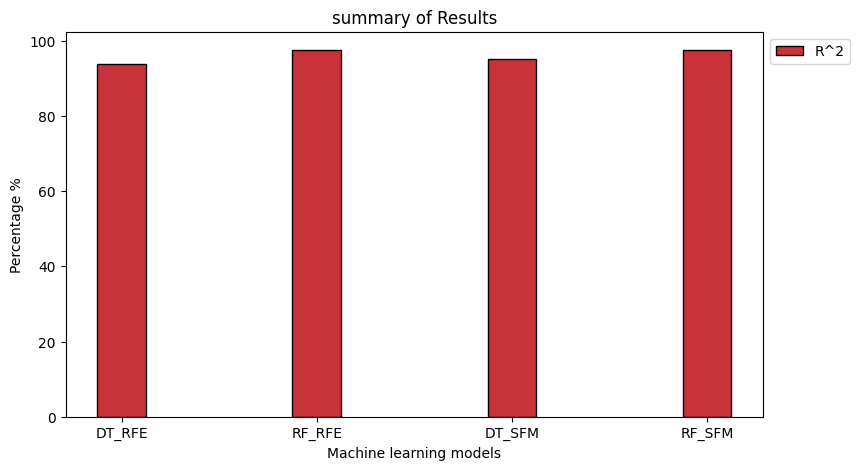

In [ ]:
machine_learning_model_r2=[avg_DT_r2_RFE*100,avg_RF_r2_RFE*100,avg_DT_r2_SFM*100,avg_RF_r2_SFM*100]
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(9, 5))

plt.bar(X_axis, machine_learning_model_r2, color ="#C73339",width = 0.25,edgecolor = 'black',label = 'R^2')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage %")
plt.title("summary of Results")
plt.show()

#####**DT & RF RMSE**

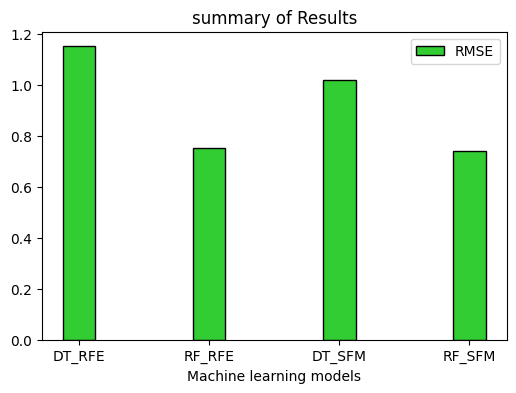

In [111]:
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
machine_learning_model_mse=[avg_DT_rmse_RFE,avg_RF_rmse_RFE,avg_DT_rmse_SFM,avg_RF_rmse_SFM]

X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(6, 4))

plt.bar(X_axis+0, machine_learning_model_mse, color ="#32CD32",width = 0.25,edgecolor = 'black',label = 'RMSE')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

####**LR**

##### **LR MSE**

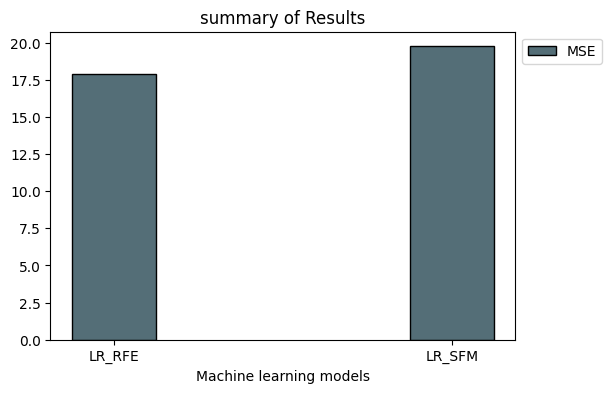

In [ ]:
machine_learning_model_name = ['LR_RFE','LR_SFM']
machine_learning_model_mse=[avg_LR_mse_RFE,avg_LR_mse_SFM]
X_axis = np.arange(len(machine_learning_model_name ))
plt.figure(figsize=(6, 4))
plt.bar(X_axis+0, machine_learning_model_mse, color ="#546E77",width = 0.25,edgecolor = 'black',label = 'MSE')
plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

##### **LR MAE**

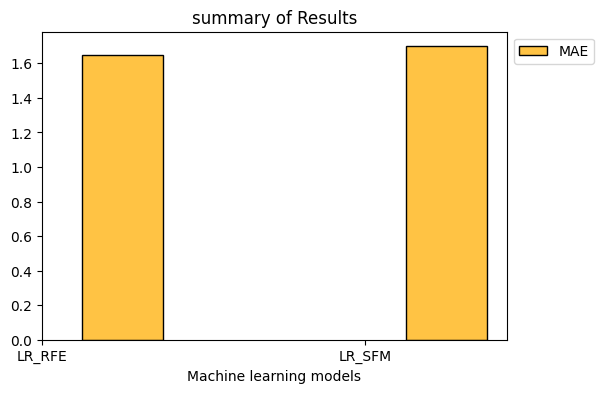

In [113]:
machine_learning_model_name = ['LR_RFE','LR_SFM']
machine_learning_model_mae=[avg_LR_mae_RFE,avg_LR_mae_SFM]
X_axis = np.arange(len(machine_learning_model_name ))
plt.figure(figsize=(6, 4))
plt.bar(X_axis+0.25, machine_learning_model_mae, color ='#FFC344',width = 0.25,edgecolor = 'black',label = 'MAE')
plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()


##### **LR R^2**

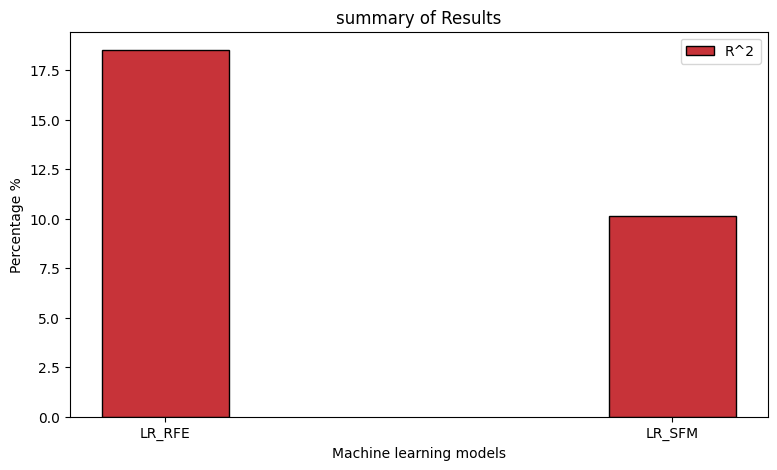

In [ ]:
machine_learning_model_r2=[avg_LR_r2_RFE*100,avg_LR_r2_SFM*100]
machine_learning_model_name = ['LR_RFE','LR_SFM']
X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(9, 5))

plt.bar(X_axis, machine_learning_model_r2, color ="#C73339",width = 0.25,edgecolor = 'black',label = 'R^2')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage %")
plt.title("summary of Results")
plt.show()

#####**LR RMSE**

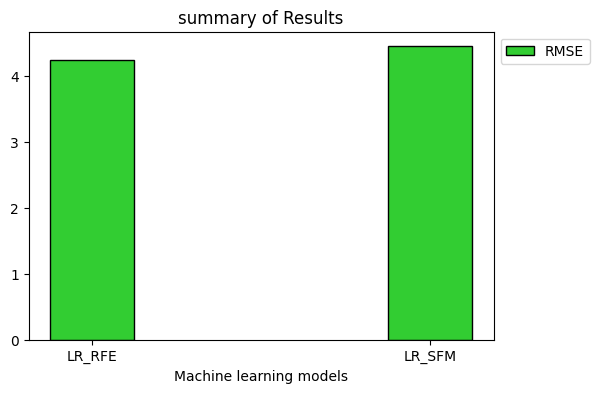

In [114]:
machine_learning_model_name = ['LR_RFE','LR_SFM']
machine_learning_model_mse=[avg_LR_rmse_RFE,avg_LR_rmse_SFM]
X_axis = np.arange(len(machine_learning_model_name ))
plt.figure(figsize=(6, 4))
plt.bar(X_axis+0, machine_learning_model_mse, color ="#32CD32",width = 0.25,edgecolor = 'black',label = 'RMSE')
plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

### **Radar Charts**

#### **DT & RF**

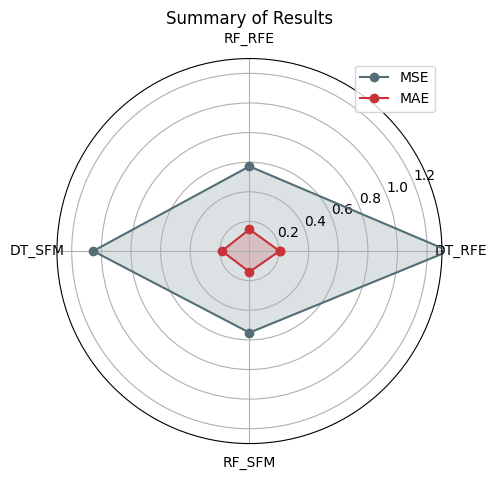

In [ ]:
machine_learning_model_name = ['DT_RFE', 'RF_RFE', 'DT_SFM', 'RF_SFM']
machine_learning_model_mse = [avg_DT_mse_RFE, avg_RF_mse_RFE, avg_DT_mse_SFM, avg_RF_mse_SFM]
machine_learning_model_mae = [avg_DT_mae_RFE, avg_RF_mae_RFE, avg_DT_mae_SFM, avg_RF_mae_SFM]
num_vars = len(machine_learning_model_name)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

machine_learning_model_mse.append(machine_learning_model_mse[0])
machine_learning_model_mae.append(machine_learning_model_mae[0])
angles.append(angles[0])

plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)

ax.plot(angles, machine_learning_model_mse, color="#546E77", linewidth=1.5, marker='o', label='MSE')
ax.fill(angles, machine_learning_model_mse, alpha=0.2, color="#546E77")

ax.plot(angles, machine_learning_model_mae, color="#C73339", linewidth=1.5, marker='o', label='MAE')
ax.fill(angles, machine_learning_model_mae, alpha=0.2, color="#C73339")

ax.set_xticks(angles[:-1])
ax.set_xticklabels(machine_learning_model_name)
ax.set_ylim(0, 1.3)
plt.title("Summary of Results")
plt.legend()
plt.show()

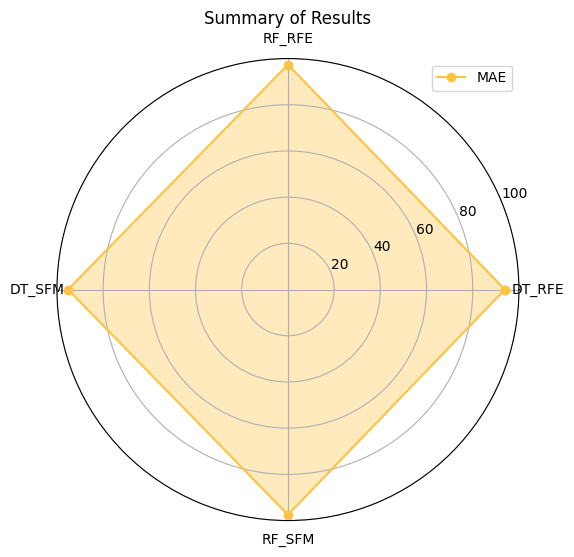

In [ ]:
machine_learning_model_r2 = [avg_DT_r2_RFE * 100, avg_RF_r2_RFE * 100, avg_DT_r2_SFM * 100, avg_RF_r2_SFM * 100]
machine_learning_model_name = ['DT_RFE', 'RF_RFE', 'DT_SFM', 'RF_SFM']
num_vars = len(machine_learning_model_name)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

machine_learning_model_r2.append(machine_learning_model_r2[0])

angles.append(angles[0])

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

ax.plot(angles, machine_learning_model_r2, color="#FFC344", linewidth=1.5, marker='o', label='MAE')
ax.fill(angles, machine_learning_model_r2, alpha=0.35, color="#FFC344")

ax.set_xticks(angles[:-1])
ax.set_xticklabels(machine_learning_model_name)

ax.set_ylim(0, 100)

plt.title("Summary of Results")
plt.legend()
plt.show()

### **Box plots**

#### **DT & RF MSE**

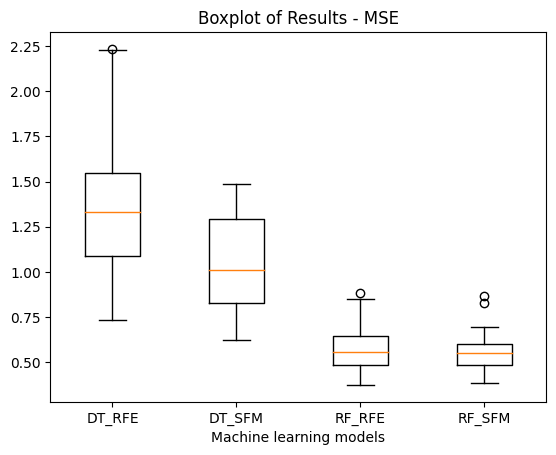

In [ ]:
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
machine_learning_model_mse=[sum_DT_mse_RFE,sum_DT_mse_SFM,sum_RF_mse_RFE,sum_RF_mse_SFM]
plt.boxplot(machine_learning_model_mse)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - MSE")
plt.show()

#### **DT & RF MAE**

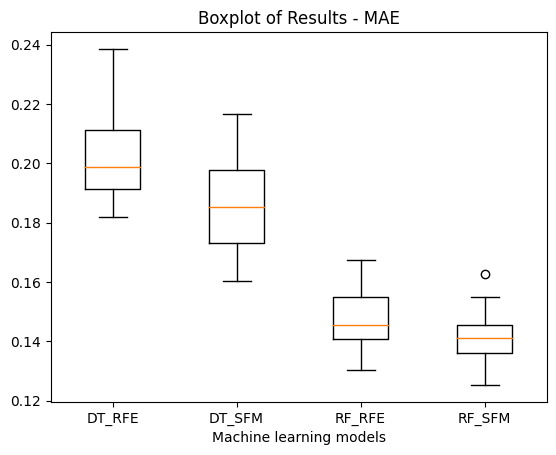

In [ ]:
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
machine_learning_model_mse=[sum_DT_mae_RFE,sum_DT_mae_SFM,sum_RF_mae_RFE,sum_RF_mae_SFM]
plt.boxplot(machine_learning_model_mse)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - MAE")
plt.show()

#### **DT & RF R^2**

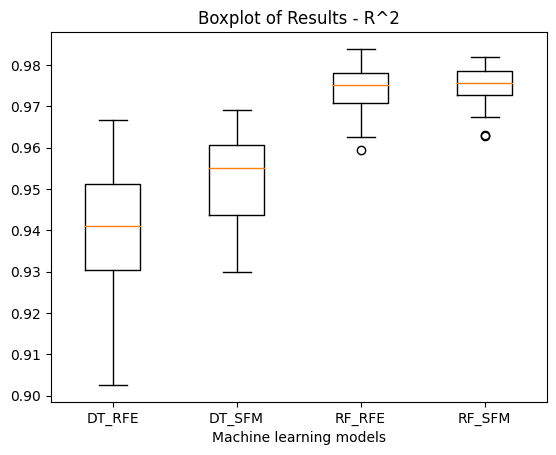

In [117]:
machine_learning_model_r2=[sum_DT_r2_RFE,sum_DT_r2_SFM,sum_RF_r2_RFE,sum_RF_r2_SFM]
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
plt.boxplot(machine_learning_model_r2)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - R^2")
plt.show()

####**DT &  RF RMSE**

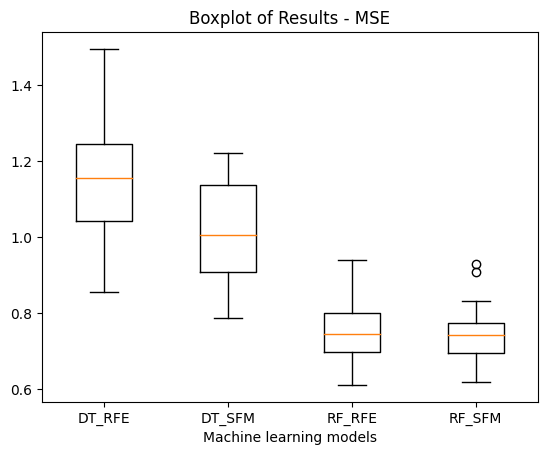

In [115]:
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
machine_learning_model_mse=[sum_DT_rmse_RFE,sum_DT_rmse_SFM,sum_RF_rmse_RFE,sum_RF_rmse_SFM]
plt.boxplot(machine_learning_model_mse)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - MSE")
plt.show()

#### **LR MSE**

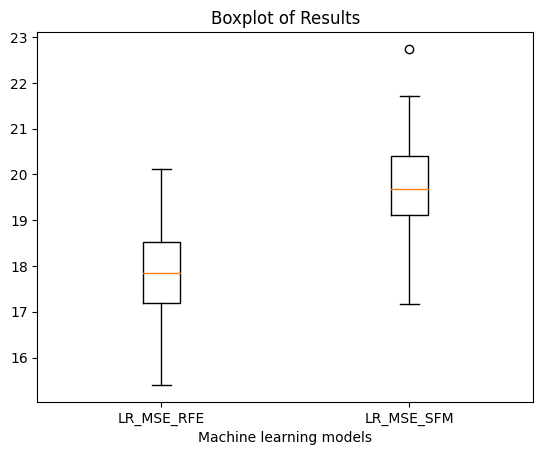

In [118]:
data = [sum_LR_mse_RFE, sum_LR_mse_SFM]
data_names = ['LR_MSE_RFE', 'LR_MSE_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results")
plt.show()

#### **LR MAE**

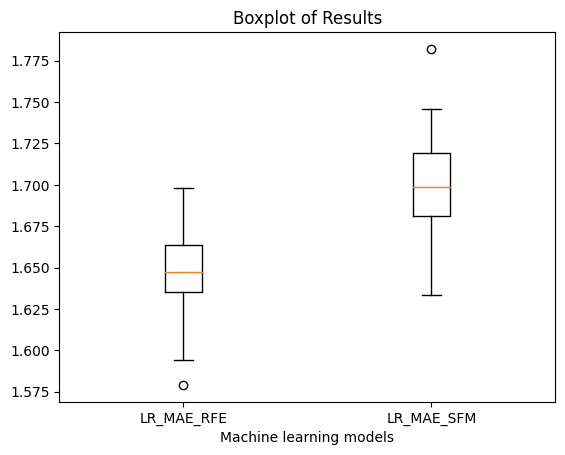

In [120]:
data = [sum_LR_mae_RFE, sum_LR_mae_SFM]
data_names = ['LR_MAE_RFE', 'LR_MAE_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results")
plt.show()

#### **LR R^2**

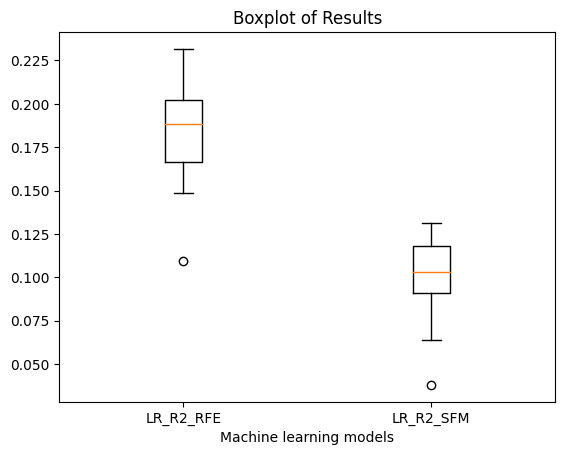

In [121]:
data = [sum_LR_r2_RFE, sum_LR_r2_SFM]
data_names = ['LR_R2_RFE', 'LR_R2_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results")
plt.show()

####**LR RMSE**

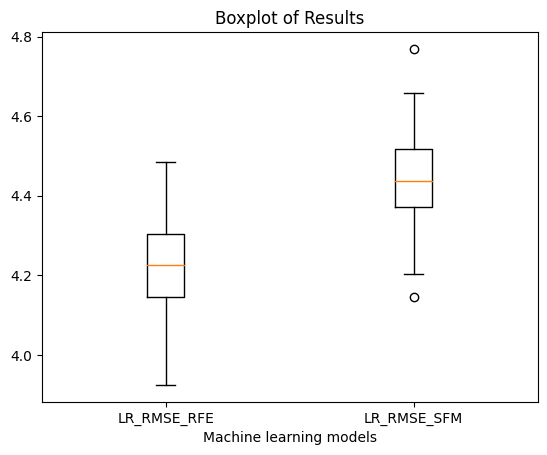

In [116]:
data = [sum_LR_rmse_RFE, sum_LR_rmse_SFM]
data_names = ['LR_RMSE_RFE', 'LR_RMSE_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results")
plt.show()

# **LOW prediction**

## **Feature selection and modelling**

### **Encoding**

In [ ]:
# df1=df_IQRandZscore.copy()
df2['TRADE_DATE'] = pd.to_datetime(df1['TRADE_DATE'])
cat_columns = df2.select_dtypes(['object', 'datetime64']).columns
label_encoder = LabelEncoder()
df2[cat_columns] = df2[cat_columns].apply(LabelEncoder().fit_transform)

In [ ]:
df2

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,0,111001,107,1,199083.73,54378,73,3.65,585.0,3.13,2000.0
1,0,111002,112,1,12707.76,9009,17,1.41,493.0,1.86,1570.0
2,0,111003,87,2,727.41,726,7,1.00,1853.0,1.64,1000.0
3,0,111004,192,1,1558.10,394,5,3.95,660.0,1.59,46.0
4,0,111006,183,1,29030.98,14867,11,1.95,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...
28007,207,141214,34,2,1025509.50,1981726,25,0.51,2462.0,2.04,0.0
28008,207,141215,200,2,154.70,455,2,0.34,6959.0,1.52,14710.0
28009,207,141223,178,2,57426.99,10276,14,5.35,70.0,1.79,0.0
28010,207,141224,151,1,1135.00,500,1,2.27,500.0,1.50,500.0


### **Select from model**

#### **Linear Regression**

In [ ]:
X = df2.drop(["LOW"], axis=1)
y = df2["LOW"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
sfm = SelectFromModel(model, threshold="median")
sfm.fit(X_train, y_train)
selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SYMBOL1', 'MARKET', 'NO_OF_TRADES', 'BEST_BID_PRICE'], dtype='object')


In [ ]:
dt = LinearRegression()
sum2_LR_mse_SFM = []
sum2_LR_mae_SFM = []
sum2_LR_rmse_SFM = []
sum2_LR_r2_SFM = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum2_LR_mse_SFM.append(mse)
  sum2_LR_mae_SFM.append(mae)
  sum2_LR_rmse_SFM.append(rmse)
  sum2_LR_r2_SFM.append(r2)

avg2_LR_mse_SFM = sum(sum2_LR_mse_SFM) / iteration
avg2_LR_mae_SFM = sum(sum2_LR_mae_SFM) / iteration
avg2_LR_rmse_SFM = sum(sum2_LR_rmse_SFM) / iteration
avg2_LR_r2_SFM = sum(sum2_LR_r2_SFM) / iteration


#### **Decision Tree**

In [ ]:
X = df2.drop(["LOW"], axis=1)
y = df2["LOW"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

sfm = SelectFromModel(model, threshold="median")
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['SYMBOL1', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')


In [ ]:
dt = DecisionTreeRegressor()
sum2_DT_mse_SFM = []
sum2_DT_mae_SFM = []
sum2_DT_rmse_SFM = []
sum2_DT_r2_SFM = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum2_DT_mse_SFM.append(mse)
  sum2_DT_mae_SFM.append(mae)
  sum2_DT_rmse_SFM.append(rmse)
  sum2_DT_r2_SFM.append(r2)

avg2_DT_mse_SFM = sum(sum2_DT_mse_SFM) / iteration
avg2_DT_mae_SFM = sum(sum2_DT_mae_SFM) / iteration
avg2_DT_rmse_SFM = sum(sum2_DT_rmse_SFM) / iteration
avg2_DT_r2_SFM = sum(sum2_DT_r2_SFM) / iteration

#### **Random Forest**

In [ ]:
X = df2.drop(["LOW"], axis=1)
y = df2["LOW"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

sfm = SelectFromModel(model, threshold='median')
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY', 'BEST_ASK_QTY'], dtype='object')


In [ ]:
dt = RandomForestRegressor()
sum2_RF_mse_SFM = []
sum2_RF_mae_SFM = []
sum2_RF_r2_SFM = []
sum2_RF_rmse_SFM = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum2_RF_mse_SFM.append(mse)
  sum2_RF_mae_SFM.append(mae)
  sum2_RF_rmse_SFM.append(rmse)
  sum2_RF_r2_SFM.append(r2)

avg2_RF_mse_SFM=sum(sum2_RF_mse_SFM)/iteration
avg2_RF_mae_SFM=sum(sum2_RF_mae_SFM)/iteration
avg2_RF_rmse_SFM = sum(sum2_DT_rmse_SFM) / iteration
avg2_RF_r2_SFM=sum(sum2_RF_r2_SFM)/iteration

### **Recursive Feature Elimination**

#### **Linear Regression**

In [ ]:
X = df2.drop(["LOW"], axis=1)
y = df2["LOW"]
estimator = LinearRegression()
n_features_to_select = 8
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)
support_mask = rfe.support_
selected_features = X.columns[support_mask]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_BID_PRICE'],
      dtype='object')


In [ ]:
dt = LinearRegression()
sum2_LR_mse_RFE = []
sum2_LR_mae_RFE = []
sum2_LR_rmse_RFE = []
sum2_LR_r2_RFE = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum2_LR_mse_RFE.append(mse)
  sum2_LR_mae_RFE.append(mae)
  sum2_LR_rmse_RFE.append(rmse)
  sum2_LR_r2_RFE.append(r2)

avg2_LR_mse_RFE = sum(sum2_LR_mse_RFE) / iteration
avg2_LR_mae_RFE = sum(sum2_LR_mae_RFE) / iteration
avg2_LR_rmse_RFE = sum(sum2_LR_rmse_RFE) / iteration
avg2_LR_r2_RFE = sum(sum2_LR_r2_RFE) / iteration


#### **Decision Tree**

In [ ]:
X = df2.drop(["LOW"], axis=1)
y = df2["LOW"]
estimator = DecisionTreeRegressor()
n_features_to_select = 8
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)
support_mask = rfe.support_
selected_features = X.columns[support_mask]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'BEST_ASK_QTY', 'BEST_BID_QTY'],
      dtype='object')


In [ ]:
dt = DecisionTreeRegressor()
sum2_DT_mse_RFE = []
sum2_DT_mae_RFE = []
sum2_DT_rmse_RFE = []
sum2_DT_r2_RFE = []

for i in range(iteration):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  sum2_DT_mse_RFE.append(mse)
  sum2_DT_mae_RFE.append(mae)
  sum2_DT_rmse_RFE.append(rmse)
  sum2_DT_r2_RFE.append(r2)

avg2_DT_mse_RFE = sum(sum2_DT_mse_RFE) / iteration
avg2_DT_mae_RFE = sum(sum2_DT_mae_RFE) / iteration
avg2_DT_rmse_RFE = sum(sum2_DT_rmse_RFE) / iteration
avg2_DT_r2_RFE = sum(sum2_DT_r2_RFE) / iteration


#### **Random Forest**

In [ ]:
X = df2.drop(["LOW"], axis=1)
y = df2["LOW"]
estimator = RandomForestRegressor()
n_features_to_select = 8
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
X_selected = rfe.fit_transform(X, y)
support_mask = rfe.support_
selected_features = X.columns[support_mask]
print("Selected features:", selected_features)
X = X[selected_features]

Selected features: Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'BEST_ASK_QTY', 'BEST_BID_PRICE'],
      dtype='object')


In [ ]:
dt = RandomForestRegressor()
sum2_RF_mse_RFE = []
sum2_RF_mae_RFE = []
sum2_RF_r2_RFE = []
sum2_RF_rmse_RFE = []

for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    sum2_RF_mse_RFE.append(mse)
    sum2_RF_rmse_RFE.append(rmse)
    sum2_RF_mae_RFE.append(mae)
    sum2_RF_r2_RFE.append(r2)

avg2_RF_mse_RFE = sum(sum2_RF_mse_RFE) / iteration
avg2_RF_rmse_RFE = sum(sum2_RF_rmse_RFE) / iteration
avg2_RF_mae_RFE = sum(sum2_RF_mae_RFE) / iteration
avg2_RF_r2_RFE = sum(sum2_RF_r2_RFE) / iteration

## **Results**

In [ ]:
print("Select from model feature selection technique:\n")
print("Linear Regression:")
print("MSE =", avg2_LR_mse_SFM)
print("MAE =", avg2_LR_mae_SFM)
print("RMSE =", avg2_LR_rmse_SFM)
print("R2 =", avg2_LR_r2_SFM * 100)
print("_____________________________________\n")
print("Decision Tree:")
print("MSE =", avg2_DT_mse_SFM)
print("MAE =", avg2_DT_mae_SFM)
print("RMSE =", avg2_DT_rmse_SFM)
print("R2 =", avg2_DT_r2_SFM * 100)
print("_____________________________________\n")
print("Random Forest:")
print("MSE =", avg2_RF_mse_SFM)
print("MAE =", avg2_RF_mae_SFM)
print("RMSE =", avg2_RF_rmse_SFM)
print("R2 =", avg2_RF_r2_SFM * 100)
print("\n_______________________________________________________________\n\n")
print("Recursive Feature Elimination technique:\n")
print("Linear Regression:")
print("MSE =", avg2_LR_mse_RFE)
print("MAE =", avg2_LR_mae_RFE)
print("RMSE =", avg2_LR_rmse_RFE)
print("R2 =", avg2_LR_r2_RFE * 100)
print("_____________________________________\n")
print("Decision Tree:")
print("MSE =", avg2_DT_mse_RFE)
print("MAE =", avg2_DT_mae_RFE)
print("RMSE =", avg2_DT_rmse_RFE)
print("R2 =", avg2_DT_r2_RFE * 100)
print("_____________________________________\n")
print("Random Forest:")
print("MSE =", avg2_RF_mse_RFE)
print("MAE =", avg2_RF_mae_RFE)
print("RMSE =", avg2_RF_rmse_RFE)
print("R2 =", avg2_RF_r2_RFE * 100)


Select from model feature selection technique:

Linear Regression:
MSE = 19.092570831670375
MAE = 1.6702994943012512
RMSE = 4.367523556671295
R2 = 9.864869907720738
_____________________________________

Decision Tree:
MSE = 1.3772986624779857
MAE = 0.20176543386167836
RMSE = 1.1693547630107977
R2 = 93.48762176227248
_____________________________________

Random Forest:
MSE = 0.5244417401647391
MAE = 0.13932697367794755
RMSE = 1.1693547630107977
R2 = 97.52911525091929

_______________________________________________________________


Recursive Feature Elimination technique:

Linear Regression:
MSE = 17.36368195173644
MAE = 1.6209996179755528
RMSE = 4.164886967748685
R2 = 18.024836404849406
_____________________________________

Decision Tree:
MSE = 1.274509872911609
MAE = 0.1985612832595554
RMSE = 1.1185955387622404
R2 = 94.01056314256043
_____________________________________

Random Forest:
MSE = 0.5427535749603029
MAE = 0.14540993240991956
RMSE = 0.7324588913698935
R2 = 97.4389807494

## **Visualization**

### **Bar plots**

####**DT & RF**

##### **DT & RF MSE**

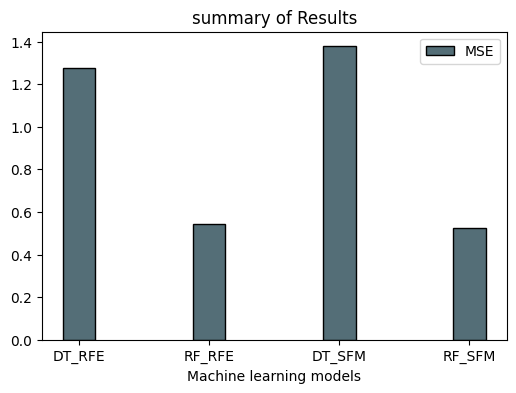

In [ ]:
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
machine_learning_model_mse=[avg2_DT_mse_RFE,avg2_RF_mse_RFE,avg2_DT_mse_SFM,avg2_RF_mse_SFM]

X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(6, 4))

plt.bar(X_axis+0, machine_learning_model_mse, color ="#546E77",width = 0.25,edgecolor = 'black',label = 'MSE')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

##### **DT & RF MAE**

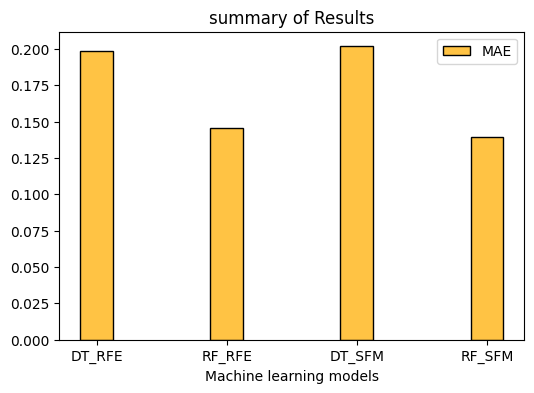

In [ ]:
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
machine_learning_model_mse=[avg2_DT_mae_RFE,avg2_RF_mae_RFE,avg2_DT_mae_SFM,avg2_RF_mae_SFM]

X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(6, 4))

plt.bar(X_axis+0, machine_learning_model_mse, color ="#FFC344",width = 0.25,edgecolor = 'black',label = 'MAE')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

##### **DT & RF R^2**

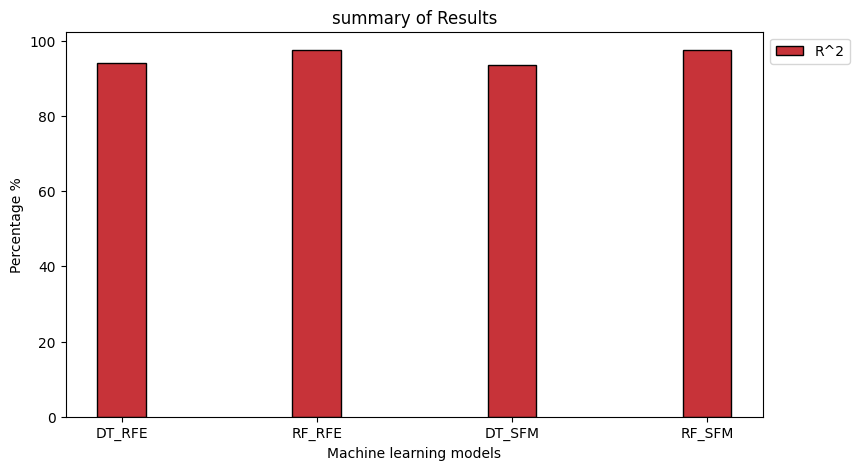

In [ ]:
machine_learning_model_r2=[avg2_DT_r2_RFE*100,avg2_RF_r2_RFE*100,avg2_DT_r2_SFM*100,avg2_RF_r2_SFM*100]
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(9, 5))

plt.bar(X_axis, machine_learning_model_r2, color ="#C73339",width = 0.25,edgecolor = 'black',label = 'R^2')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage %")
plt.title("summary of Results")
plt.show()

##### **DT & RF RMSE**

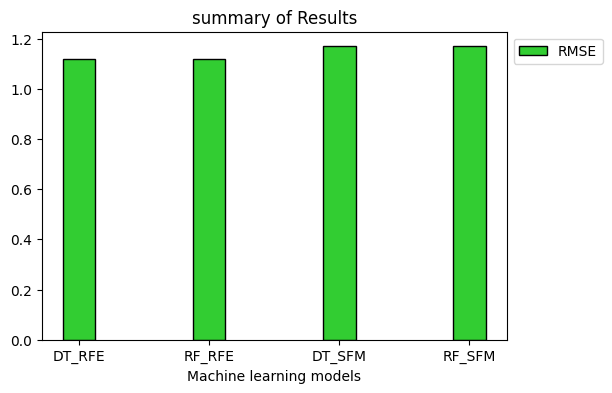

In [ ]:
machine_learning_model_name = ['DT_RFE','RF_RFE',"DT_SFM","RF_SFM"]
machine_learning_model_mse=[avg2_DT_rmse_RFE,avg2_DT_rmse_RFE,avg2_DT_rmse_SFM,avg2_DT_rmse_SFM]

X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(6, 4))

plt.bar(X_axis+0, machine_learning_model_mse, color ="#32CD32",width = 0.25,edgecolor = 'black',label = 'RMSE')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

####**LR**

##### **LR MSE**

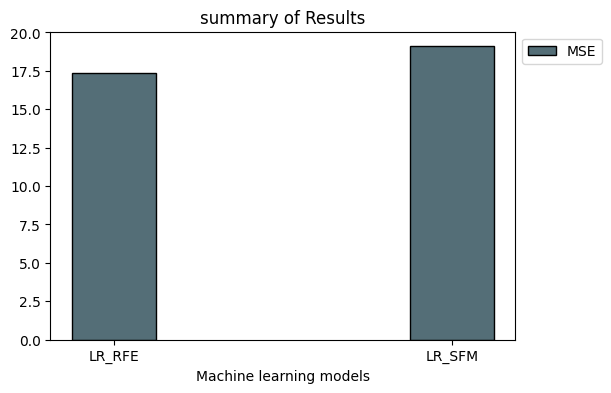

In [ ]:
machine_learning_model_name = ['LR_RFE','LR_SFM']
machine_learning_model_mse=[avg2_LR_mse_RFE,avg2_LR_mse_SFM]
X_axis = np.arange(len(machine_learning_model_name ))
plt.figure(figsize=(6, 4))
plt.bar(X_axis+0, machine_learning_model_mse, color ="#546E77",width = 0.25,edgecolor = 'black',label = 'MSE')
plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()

##### **LR MAE**

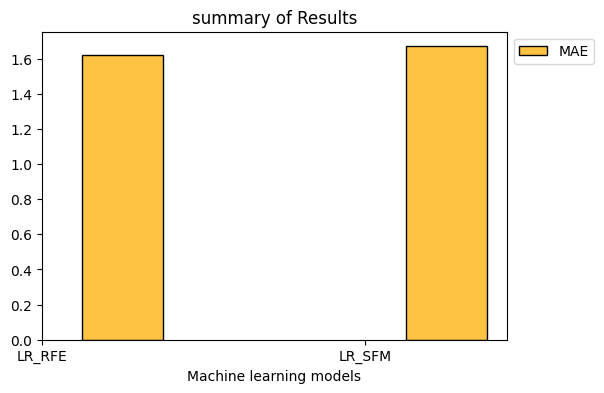

In [ ]:
machine_learning_model_name = ['LR_RFE','LR_SFM']
machine_learning_model_mae=[avg2_LR_mae_RFE,avg2_LR_mae_SFM]
X_axis = np.arange(len(machine_learning_model_name ))
plt.figure(figsize=(6, 4))
plt.bar(X_axis+0.25, machine_learning_model_mae, color ='#FFC344',width = 0.25,edgecolor = 'black',label = 'MAE')
plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()


##### **LR R^2**

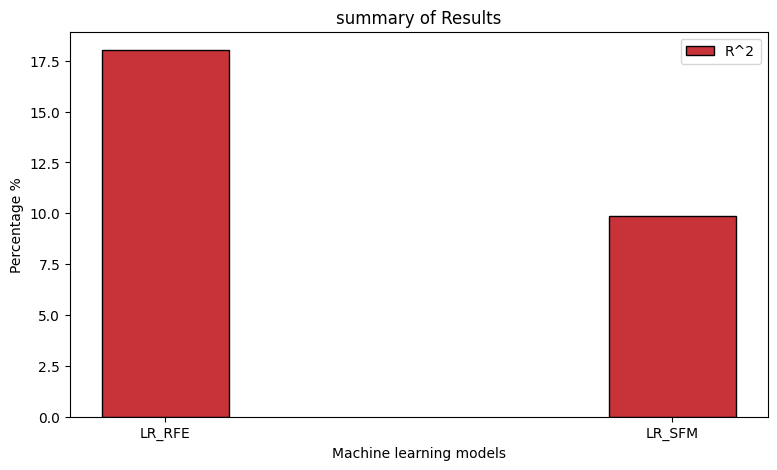

In [ ]:
machine_learning_model_r2=[avg2_LR_r2_RFE*100,avg2_LR_r2_SFM*100]
machine_learning_model_name = ['LR_RFE','LR_SFM']
X_axis = np.arange(len(machine_learning_model_name ))

plt.figure(figsize=(9, 5))

plt.bar(X_axis, machine_learning_model_r2, color ="#C73339",width = 0.25,edgecolor = 'black',label = 'R^2')

plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage %")
plt.title("summary of Results")
plt.show()

#####**LR RMSE**

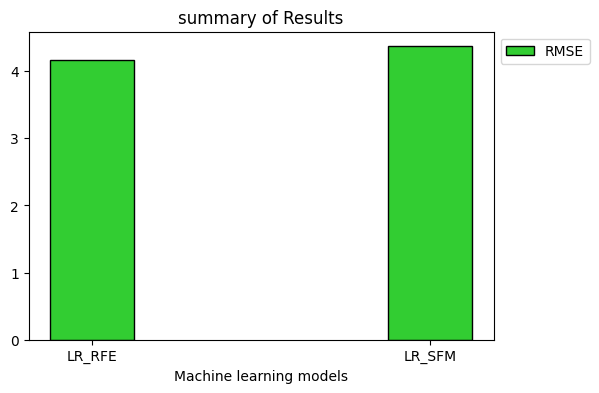

In [104]:
machine_learning_model_name = ['LR_RFE','LR_SFM']
machine_learning_model_mae=[avg2_LR_rmse_RFE,avg2_LR_rmse_SFM]
X_axis = np.arange(len(machine_learning_model_name ))
plt.figure(figsize=(6, 4))
plt.bar(X_axis, machine_learning_model_mae, color ='#32CD32',width = 0.25,edgecolor = 'black',label = 'RMSE')
plt.xticks(X_axis, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.title("summary of Results")
plt.show()


### **Radar Chart**

#### **DT & RF**

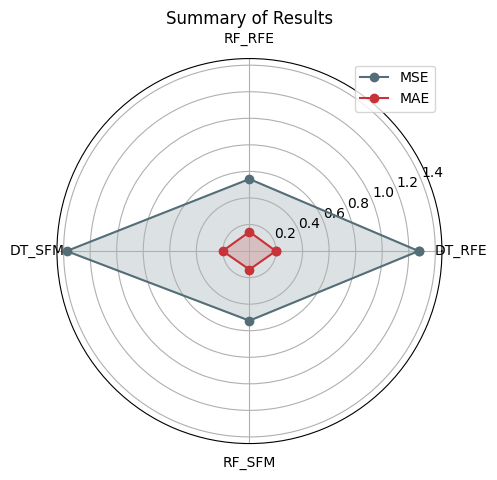

In [101]:
machine_learning_model_name = ['DT_RFE', 'RF_RFE', 'DT_SFM', 'RF_SFM']
machine_learning_model_mse = [avg2_DT_mse_RFE, avg2_RF_mse_RFE, avg2_DT_mse_SFM, avg2_RF_mse_SFM]
machine_learning_model_mae = [avg2_DT_mae_RFE, avg2_RF_mae_RFE, avg2_DT_mae_SFM, avg2_RF_mae_SFM]
num_vars = len(machine_learning_model_name)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

machine_learning_model_mse.append(machine_learning_model_mse[0])
machine_learning_model_mae.append(machine_learning_model_mae[0])
angles.append(angles[0])

plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)

ax.plot(angles, machine_learning_model_mse, color="#546E77", linewidth=1.5, marker='o', label='MSE')
ax.fill(angles, machine_learning_model_mse, alpha=0.2, color="#546E77")

ax.plot(angles, machine_learning_model_mae, color="#C73339", linewidth=1.5, marker='o', label='MAE')
ax.fill(angles, machine_learning_model_mae, alpha=0.2, color="#C73339")

ax.set_xticks(angles[:-1])
ax.set_xticklabels(machine_learning_model_name)
ax.set_ylim(0, 1.45)
plt.title("Summary of Results")
plt.legend()
plt.show()

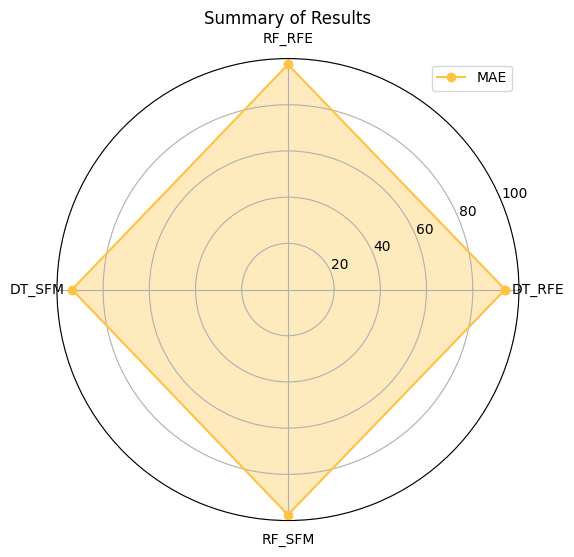

In [ ]:
machine_learning_model_r2 = [avg2_DT_r2_RFE * 100, avg2_RF_r2_RFE * 100, avg2_DT_r2_SFM * 100, avg2_RF_r2_SFM * 100]
machine_learning_model_name = ['DT_RFE', 'RF_RFE', 'DT_SFM', 'RF_SFM']
num_vars = len(machine_learning_model_name)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

machine_learning_model_r2.append(machine_learning_model_r2[0])

angles.append(angles[0])

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

ax.plot(angles, machine_learning_model_r2, color="#FFC344", linewidth=1.5, marker='o', label='MAE')
ax.fill(angles, machine_learning_model_r2, alpha=0.35, color="#FFC344")

ax.set_xticks(angles[:-1])
ax.set_xticklabels(machine_learning_model_name)

ax.set_ylim(0, 100)

plt.title("Summary of Results")
plt.legend()
plt.show()

### **Box plots**

#### **DT & RF MSE**

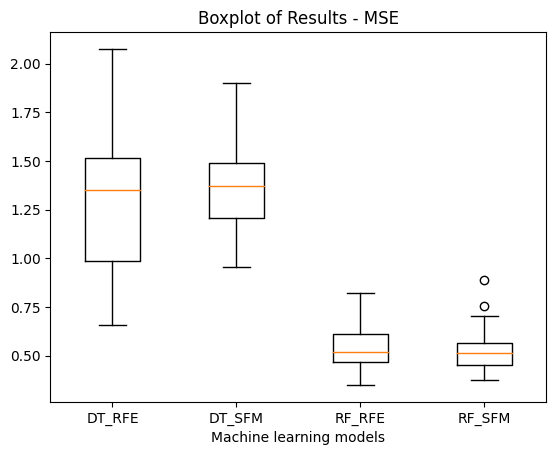

In [ ]:
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
machine_learning_model_mse=[sum2_DT_mse_RFE,sum2_DT_mse_SFM,sum2_RF_mse_RFE,sum2_RF_mse_SFM]
plt.boxplot(machine_learning_model_mse)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - MSE")
plt.show()

#### **DT & RF MAE**

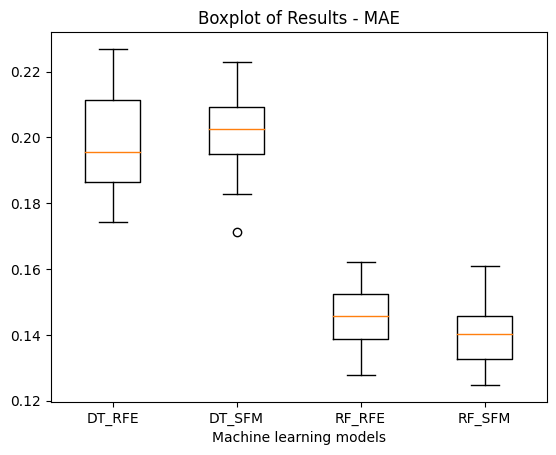

In [ ]:
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
machine_learning_model_mse=[sum2_DT_mae_RFE,sum2_DT_mae_SFM,sum2_RF_mae_RFE,sum2_RF_mae_SFM]
plt.boxplot(machine_learning_model_mse)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - MAE")
plt.show()

#### **DT & RF R^2**

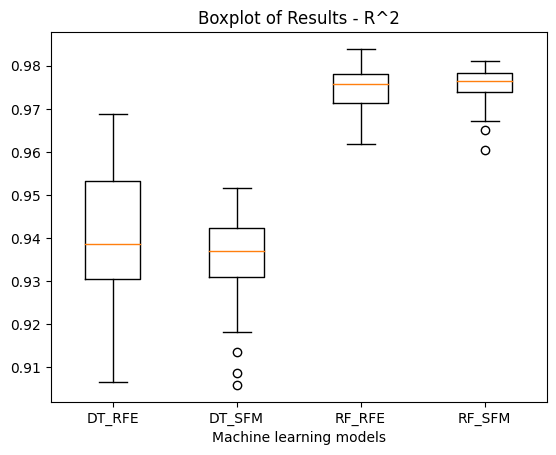

In [ ]:
machine_learning_model_r2=[sum2_DT_r2_RFE,sum2_DT_r2_SFM,sum2_RF_r2_RFE,sum2_RF_r2_SFM]
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
plt.boxplot(machine_learning_model_r2)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - R^2")
plt.show()

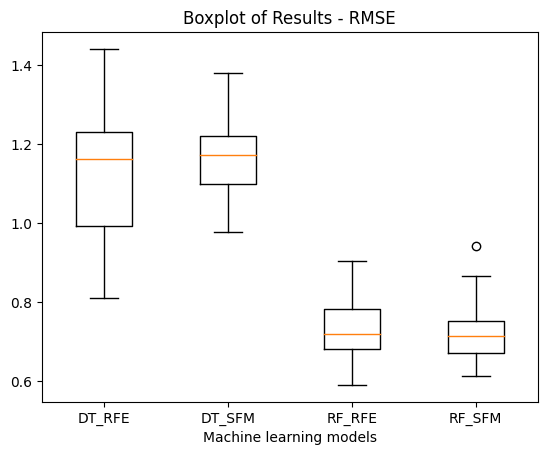

In [ ]:
machine_learning_model_name = ['DT_RFE',"DT_SFM",'RF_RFE',"RF_SFM"]
machine_learning_model_mse=[sum2_DT_rmse_RFE,sum2_DT_rmse_SFM,sum2_RF_rmse_RFE,sum2_RF_rmse_SFM]
plt.boxplot(machine_learning_model_mse)
X_axis = np.arange(len(machine_learning_model_name ))
plt.xticks(X_axis+1, machine_learning_model_name )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - RMSE")
plt.show()

#### **LR MSE**

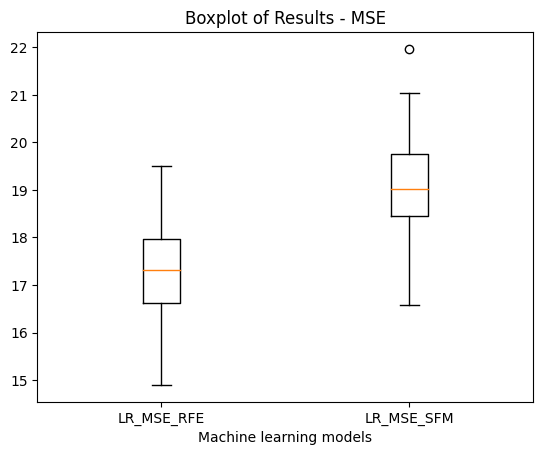

In [ ]:
data = [sum2_LR_mse_RFE, sum2_LR_mse_SFM]
data_names = ['LR_MSE_RFE', 'LR_MSE_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results - MSE")
plt.show()

#### **LR MAE**

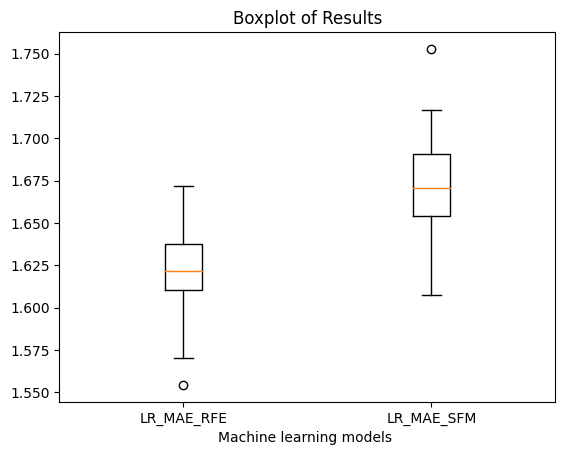

In [106]:
data = [sum2_LR_mae_RFE, sum2_LR_mae_SFM]
data_names = ['LR_MAE_RFE', 'LR_MAE_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models ")
plt.title("Boxplot of Results")
plt.show()

#### **LR R^2**

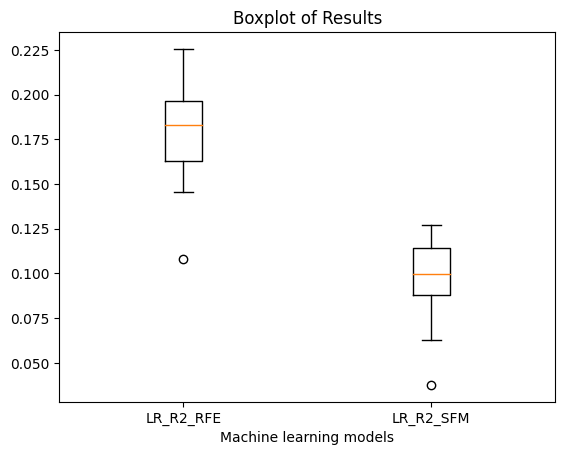

In [109]:
data = [sum2_LR_r2_RFE, sum2_LR_r2_SFM]
data_names = ['LR_R2_RFE', 'LR_R2_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results")
plt.show()

#### **LR RMSE**

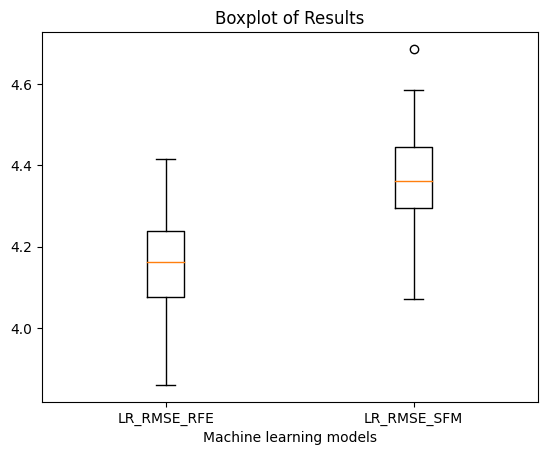

In [108]:
data = [sum2_LR_rmse_RFE, sum2_LR_rmse_SFM]
data_names = ['LR_RMSE_RFE', 'LR_RMSE_SFM']
plt.boxplot(data)
X_axis = np.arange(len(data_names ))
plt.xticks(X_axis+1, data_names )
plt.xlabel("Machine learning models")
plt.title("Boxplot of Results")
plt.show()